In [1]:
%matplotlib inline

In [51]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.xarray

sns.set(style='ticks', context='paper', palette='colorblind',font_scale=1.3)
mpl.rc('figure', dpi=100, figsize=[11, 5])
mpl.rc('savefig', dpi=500, bbox='tight')
mpl.rc('legend', frameon=False)


from deformtools.tools import alphabet
import warnings

warnings.simplefilter('ignore')

In [4]:
dat = xr.open_mfdataset('../data/clusters/combinations_lt_10_*.nc',concat_dim='clusters',)

In [5]:
dat['vortpos'] = np.abs( dat.vort.where(dat.vort>0) )
dat['vortneg'] = np.abs( dat.vort.where(dat.vort<0) )

dat['divpos'] = np.abs( dat.div.where(dat.div>0) )
dat['divneg'] = np.abs( dat.div.where(dat.div<0) )

dat['absstrain'] = np.abs( dat.strain )

In [6]:
counted = dat.groupby_bins(dat.length,np.logspace(-1,2,50)).count()

In [7]:
counted.vortpos

<xarray.DataArray 'vortpos' (length_bins: 49)>
dask.array<shape=(49,), dtype=float64, chunksize=(22,)>
Coordinates:
  * length_bins  (length_bins) object (0.1, 0.115] ... (86.851, 100.0]

In [8]:
grouped = dat.groupby_bins(dat.length,np.logspace(-1,2,50)).mean()
grouped_aspect = dat.groupby_bins(dat.aspect,np.logspace(-2,0,20)).mean()

In [101]:
# AGU figure dimensions
fullpage = tuple( np.array([19.0,23.0])/2.54 )
quarterpage = tuple( np.array([9.5,11.5])/2.54 )
halfpage_hor = tuple( np.array([19.0,11.5])/2.54 )
halfpage_hor_almost = tuple( np.array([25.0,10])/2.54 )
halfpage_ver = tuple( np.array([9.5,23.0])/2.54 )

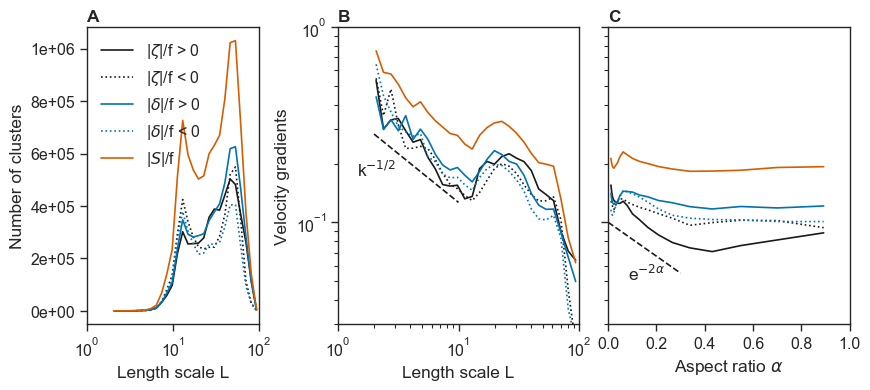

In [117]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from matplotlib.ticker import FormatStrFormatter

fig = plt.figure(figsize=halfpage_hor_almost)
# create a 1-row 3-column container as the left container
gs_left = gridspec.GridSpec(1, 1)

# create a 1-row 1-column grid as the right container
gs_right = gridspec.GridSpec(1, 2)

# add plots to the nested structure
ax0 = fig.add_subplot(gs_left[0,0])

ax1 = fig.add_subplot(gs_right[0,0])
ax2 = fig.add_subplot(gs_right[0,1], sharey=ax1)

counted.vortpos.plot(label=r'|$\zeta$|/f > 0',ax=ax0,color='k')
counted.vortneg.plot(label=r'|$\zeta$|/f < 0',ax=ax0,color='k', ls='dotted')
counted.divpos.plot(label=r'|$\delta$|/f > 0',ax=ax0,color='b')
counted.divneg.plot(label=r'|$\delta$|/f < 0',ax=ax0,color='b',ls='dotted')
counted.absstrain.plot(label=r'|$S$|/f',ax=ax0, color='r')

# ax0.set_yscale('log')
ax0.set_xscale('log')
ax0.set_ylabel(None)
ax0.set_xlabel(r'Length scale L')
ax0.legend()
ax0.set_xlim(1e0,1e2)
ax0.set_xticks([1e0,1e1,1e2])
ax0.set_ylabel('Number of clusters')
# ax0.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax0.yaxis.set_major_formatter(FormatStrFormatter('%.0e'))

grouped.vortpos.plot(label=r'|$\zeta$|/f > 0',ax=ax1,color='k')
grouped.vortneg.plot(label=r'|$\zeta$|/f < 0',ax=ax1,color='k',ls='dotted')
grouped.divpos.plot(label=r'|$\delta$|/f > 0',ax=ax1,color='b')
grouped.divneg.plot(label=r'|$\delta$|/f < 0',ax=ax1,color='b',ls='dotted')
grouped.absstrain.plot(label=r'|$S$|/f',ax=ax1, color='r')

x = np.logspace(0.3,1,2)
ax1.plot(x,0.4*x**-(1/2),color='k',ls='dashed')
ax1.annotate(r'k$^{-1/2}$',(0.08,0.5),xycoords='axes fraction')
ax1.set_ylim(3e-2,1e0)
ax1.set_xscale('log')
ax1.set_yscale('log')
# ax1.legend()
ax1.set_ylabel('Velocity gradients')
ax1.set_xlabel('Length scale L')
ax1.set_xlim(1e0,1e2)
ax1.set_xticks([1e0,1e1,1e2])
# plt.setp(ax1.get_yticklabels(), visible=False);

grouped_aspect.vortpos.plot(label=r'|$\zeta$|/f > 0',ax=ax2,color='k')
grouped_aspect.vortneg.plot(label=r'|$\zeta$|/f < 0',ax=ax2,color='k', ls='dotted')
grouped_aspect.divpos.plot(label=r'|$\delta$|/f > 0',ax=ax2,color='b')
grouped_aspect.divneg.plot(label=r'|$\delta$|/f < 0',ax=ax2,color='b',ls='dotted')
grouped_aspect.absstrain.plot(label=r'|$S$|/f',ax=ax2, color='r')

ax2.set_yscale('log')
# ax2.set_xscale('log')
ax2.set_ylabel(None)
ax2.set_xlim(0,1)
ax2.set_xlabel(r'Aspect ratio $\alpha$')
# ax[1].legend()
plt.setp(ax2.get_yticklabels(), visible=False);

x = np.linspace(0,0.3,2)
ax2.plot(x,0.1*np.exp(x*-(2)),color='k',ls='dashed')
ax2.annotate(r'e$^{-2\alpha}$',(0.08,0.15),xycoords='axes fraction')

# now the plots are on top of each other, we'll have to adjust their edges so that they won't overlap
gs_left.update(right=0.3)
gs_right.update(left=0.38)

# also, we want to get rid of the horizontal spacing in the left gridspec
gs_right.update(wspace=0.12)

alphabet([ax0,ax1,ax2])

plt.savefig('../figures/length_scale.pdf')